# Test Data Preparation

In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import SimpleITK as sitk

In [2]:
ratto_pipeline_data_dir = Path('/net/birdstore/Active_Atlas_Data/data_root/pipeline_data')

## Load image stacks

In [3]:
def load_image_stack(image_dir, channel=1):
    image_dir = Path(image_dir).resolve()
    image_stack = []
    for image_file in sorted(image_dir.iterdir()):
        print(f'Loading image {image_file.name}', end='\r')
        image = sitk.ReadImage(image_file.as_posix())
        image_arr = sitk.GetArrayViewFromImage(image).copy()
        image_stack.append(image_arr[:,:,channel-1].T)
    print(f'Finished loading {len(image_stack)} images')
    image_stack = np.stack(image_stack, axis=-1)
    return image_stack

In [4]:
image_585 = load_image_stack(ratto_pipeline_data_dir / 'MD585/preps/CH1/thumbnail_aligned')
image_585.shape

Finished loading 446 images


(1193, 875, 446)

In [5]:
image_589 = load_image_stack(ratto_pipeline_data_dir /'MD589/preps/CH1/thumbnail_aligned')
image_589.shape

Finished loading 447 images


(1365, 1012, 447)

In [6]:
def preview(image):
    mid_x, mid_y, mid_z = np.array(image.shape) // 2
    fig, ax = plt.subplots(1, 3)
    ax[0].imshow(image[mid_x,:,:])
    ax[1].imshow(image[:,mid_y,:])
    ax[2].imshow(image[:,:,mid_z])
    plt.show()

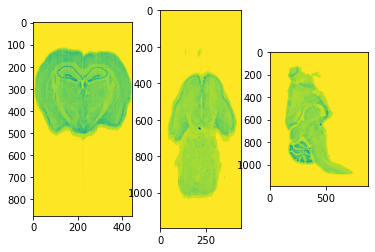

In [7]:
preview(image_585)

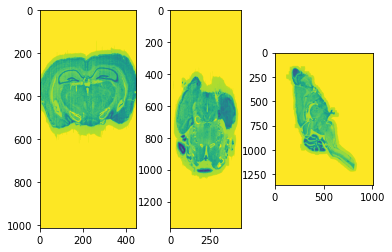

In [8]:
preview(image_589)

## Pad image to the same shape

In [9]:
def pad(image1, image2):
    shape = max(image1.shape, image2.shape)
    image1_padded = np.zeros(shape, dtype=image1.dtype) + 255
    image1_padded[:image1.shape[0],:image1.shape[1],:image1.shape[2]] = image1
    image2_padded = np.zeros(shape, dtype=image2.dtype) + 255
    image2_padded[:image2.shape[0],:image2.shape[1],:image2.shape[2]] = image2
    return image1_padded, image2_padded

In [10]:
image_585, image_589 = pad(image_585, image_589)
print(image_585.shape)
print(image_589.shape)

(1365, 1012, 447)
(1365, 1012, 447)


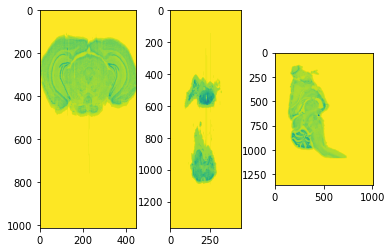

In [11]:
preview(image_585)

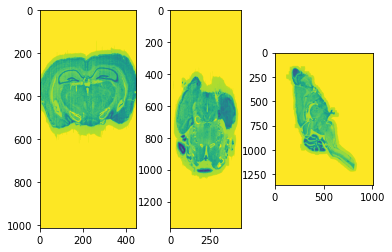

In [12]:
preview(image_589)

## Save image to npy file

In [13]:
np.save('../data/local/MD585_CH1.npy', image_585)

In [14]:
np.save('../data/local/MD589_CH1.npy', image_589)